In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.datasets import make_blobs

In [28]:
X, y = make_blobs(100, centers=6, random_state=42)

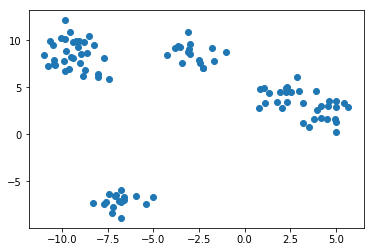

In [29]:
plt.scatter(X[:, 0], X[:, 1])

In [30]:
class Cluster:
    
    def __init__(self, center, label):
        
        self.center = center
        self.label = label
        self.points = []
    
    
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())

In [31]:
class KMeansCustom:
    
    def __init__(self, n_clusters=3, max_iters=20, n_init=10):
        
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_init = n_init
        
    def fit(self, X):
        
        self.__X = X
        
        steps = []
        
        for simulation in range(self.n_init):

            clusters = []

            for i in range(self.n_clusters):
                cluster = Cluster(random.choice(X), i)
                clusters.append(cluster)

            errors = []

            for i in range(self.max_iters):
                labels = []

                for point in X:
                    distances = []

                    for cluster in clusters:
                        dis = cluster.distance(point)
                        distances.append((dis, cluster))

                    index = np.array(distances)[:, 0].argmin()

                    selected_dis, selected_cluster = distances[index]

                    selected_cluster.points.append(point)
                    labels.append(selected_cluster.label)

                for cluster in clusters:
                    cluster.relocate()

                errors.append(self.error(labels, clusters))

            final_error = errors[-1]
            
            steps.append((final_error, labels, clusters))

        index = np.array(steps)[:, 0].argmin()
        
        result_err, result_labels, result_clusters = steps[index]
        
        self.labels_ = result_labels
        self.cluster_centers_ = [cluster.center for cluster in result_clusters]

            
    def error(self, labels, clusters):
        
        error = 0
        
        for point, label in zip(self.__X, labels):
            cluster = clusters[label]
            error += cluster.distance(point)
            
        return error
            
        

In [32]:
random.choice(X)

array([-10.47216755,   9.55192215])

In [41]:
model = KMeansCustom(6, n_init=10)

In [42]:
model.fit(X)

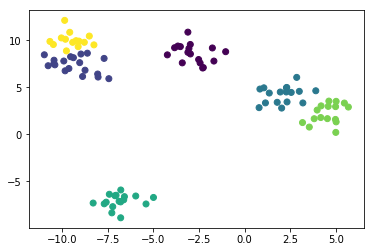

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)